## Trained Models Tests ##

This notebook helps to test different trained models, compare their accuracy and their efficiency.

In [1]:
# Initialization : importing useful libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras

import sys
sys.path.append("..") 
import tools.modtester as tester

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

2022-11-01 12:06:17.665528: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Creation of the prediction functions.

### Model 1 ###

model_20E_fulldata.h5

Number of Epochs : 20 

Dataset : Full Dataset

Color : COLORFUL 


// Insert here a scheme of the NN (layers), parameters //

#### Testing Model with Colorful Images ####


In [9]:
sys.path.append("..") 
tester.testmodel('src/model/model_20E_fulldata.h5',True)


OSError: No file or directory found at src/model/model_20E_fulldata.h5

#### Testing Model with black and white images ####

Found 144 files belonging to 6 classes.
Found 6 files belonging to 6 classes.
2/2 [==============================] - 0s 20ms/step
Image 0 || Predicted Disease : M || True Disease : F
Image 1 || Predicted Disease : M || True Disease : M
Image 2 || Predicted Disease : M || True Disease : N
Image 3 || Predicted Disease : M || True Disease : Q
Image 4 || Predicted Disease : M || True Disease : S
Image 5 || Predicted Disease : M || True Disease : V
29/29 [==============================] - 2s 52ms/step


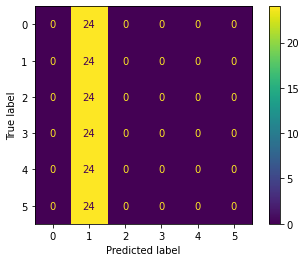

In [19]:
tester.testmodel('model/model_20E_fulldata.h5',False)

### Model 2 ###

model_test_smalldata_bw.h5

Number of Epochs : 20 

Dataset : Small Dataset

Color : BW 


Found 144 files belonging to 6 classes.
Found 6 files belonging to 6 classes.
2/2 [==============================] - 0s 21ms/step
Image 0 || Predicted Disease : Q || True Disease : F
Image 1 || Predicted Disease : Q || True Disease : M
Image 2 || Predicted Disease : Q || True Disease : N
Image 3 || Predicted Disease : Q || True Disease : Q
Image 4 || Predicted Disease : Q || True Disease : S
Image 5 || Predicted Disease : Q || True Disease : V
29/29 [==============================] - 2s 51ms/step


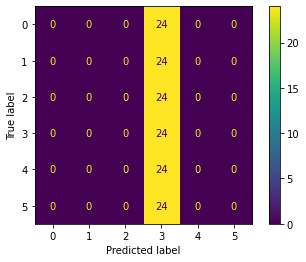

In [20]:
tester.testmodel('model/model_test_smalldata_bw.h5',False)


#### Model 3 ###

model_20E_6_4_bw.h5

Number of Epochs : 20 

Dataset : Full Dataset

Color : BW

6:4

Found 144 files belonging to 6 classes.
Found 6 files belonging to 6 classes.
2/2 [==============================] - 0s 17ms/step
Image 0 || Predicted Disease : N || True Disease : F
Image 1 || Predicted Disease : N || True Disease : M
Image 2 || Predicted Disease : N || True Disease : N
Image 3 || Predicted Disease : N || True Disease : Q
Image 4 || Predicted Disease : N || True Disease : S
Image 5 || Predicted Disease : N || True Disease : V
29/29 [==============================] - 2s 56ms/step


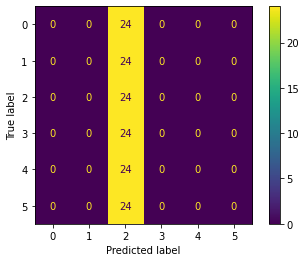

In [21]:
tester.testmodel('model/model_20E_6_4_bw.h5',False)


#### Model 4 ###

model_20E_8_2_bw

Number of Epochs : 20 

Dataset : Full Dataset

Color : BW

8:2

Found 144 files belonging to 6 classes.
Found 6 files belonging to 6 classes.
2/2 [==============================] - 0s 24ms/step
Image 0 || Predicted Disease : N || True Disease : F
Image 1 || Predicted Disease : N || True Disease : M
Image 2 || Predicted Disease : N || True Disease : N
Image 3 || Predicted Disease : N || True Disease : Q
Image 4 || Predicted Disease : N || True Disease : S
Image 5 || Predicted Disease : N || True Disease : V
29/29 [==============================] - 2s 58ms/step


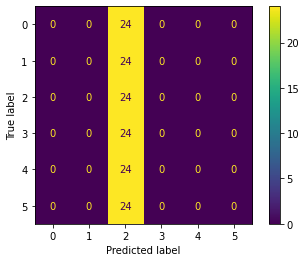

In [22]:
model4 = tf.keras.models.load_model('model/model_20E_8_2_bw.h5')

tester.testmodel('model/model_20E_8_2_bw.h5',False)


#### Model 5 ####
model= keras.Sequential([
    keras.layers.Conv2D(32, 3, padding='same', activation='relu',input_shape=(256,256,3)), 
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(6)
])

model.build((None,256,256,3))

#Model Compiler
model.compile(optimizer="Adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Model summary 
model.summary()

model_2710_testvalerie.h5


Found 144 files belonging to 6 classes.
Found 6 files belonging to 6 classes.
2/2 [==============================] - 0s 44ms/step
Image 0 || Predicted Disease : F || True Disease : F
Image 1 || Predicted Disease : M || True Disease : M
Image 2 || Predicted Disease : N || True Disease : N
Image 3 || Predicted Disease : Q || True Disease : Q
Image 4 || Predicted Disease : S || True Disease : S
Image 5 || Predicted Disease : V || True Disease : V
29/29 [==============================] - 3s 110ms/step


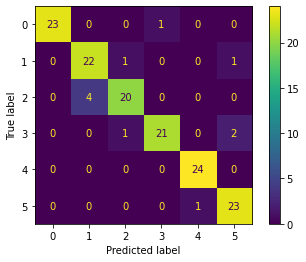

In [23]:
tester.testmodel('model/model_2710_testvalerie.h5',False)


## Notes ##

To try : 

- train this models with approximately 100 images from each category. See if the value accuracy can be better than 0.6 

#### Model 4 ###

model_20E_8_2_bw

Number of Epochs : 20 

Dataset : Full Dataset

Color : BW

8:2

Found 144 files belonging to 6 classes.
Found 6 files belonging to 6 classes.
2/2 [==============================] - 0s 24ms/step
Image 0 || Predicted Disease : N || True Disease : F
Image 1 || Predicted Disease : N || True Disease : M
Image 2 || Predicted Disease : N || True Disease : N
Image 3 || Predicted Disease : N || True Disease : Q
Image 4 || Predicted Disease : N || True Disease : S
Image 5 || Predicted Disease : N || True Disease : V
29/29 [==============================] - 1s 42ms/step


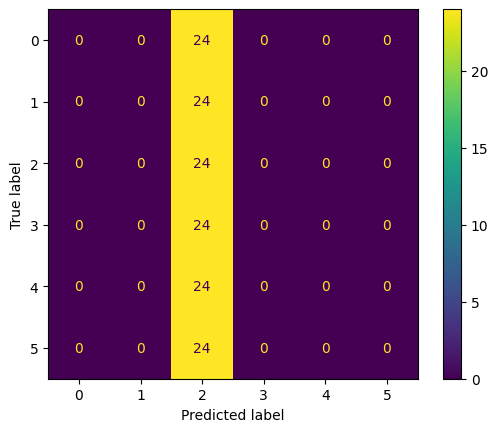

In [5]:
model4 = tf.keras.models.load_model('model/model_20E_8_2_bw.h5')

simpledata=tf.keras.utils.image_dataset_from_directory("Small_dataset/S_datas_labels_cb_bw",shuffle=False,batch_size=5)
predictdata=tf.keras.utils.image_dataset_from_directory("Small_dataset/S_prediction_datas_labels_bw",shuffle=False,batch_size=5)


tester.modeltest(model4,predictdata)
tester.confusionmatrix(model4,simpledata)